In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 100000

2023-04-18 11:45:17.633022: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 11:45:17.646306: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 11:45:17.718938: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 11:45:17.719704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 11:45:18.168749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
np.random.seed(7)

In [3]:
from tensorflow.python import data
ball_datasetdir = '../datasets/bearing dataset/ball fault/'
inner_datasetdir = '../datasets/bearing dataset/inner race fault/'
outer_datasetdir = '../datasets/bearing dataset/outer race fault/'
figuredir = '../figures/full dataset/'
datasetdir = '../datasets/newdataset/'

import os

CHECK_FOLDER = os.path.isdir(datasetdir)

if not CHECK_FOLDER:
  os.makedirs(datasetdir)
  print("Created folder : ", datasetdir)
else:
  print(datasetdir, "Folder already exists")

CHECK_FOLDER = os.path.isdir(figuredir)

if not CHECK_FOLDER:
  os.makedirs(figuredir)
  print("Created folder : ", figuredir)
else:
  print(figuredir, "Folder already exists")

../datasets/newdataset/ Folder already exists
../figures/full dataset/ Folder already exists


In [4]:
def data_frame(datasetdir, fault):
  import scipy.io
  data = []

  for file in os.listdir(datasetdir):
    # Check whether file is in the text format or not
    if file.endswith(".mat"):
      dt = {}
      file_path = f"{datasetdir}\{file}"
      mat = scipy.io.loadmat(datasetdir + file)
      speed = mat['Channel_2'];
      vibration = mat['Channel_1'];
      df = pd.DataFrame(data=speed, columns=["speed"])
      df['vibration'] = vibration
      df['Faults'] = fault
      data.append(df)
  frame = pd.concat(data, axis=0, ignore_index=True)

  return frame

In [5]:
ball = data_frame(ball_datasetdir, 'Ball')
innerrace = data_frame(inner_datasetdir, 'Innerrace')
outerrace = data_frame(outer_datasetdir, 'Outerrace')

In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
ball, innerrace, outerrace

(             speed  vibration Faults
 0         0.036017  -0.013051   Ball
 1         0.035360  -0.012723   Ball
 2         0.036346  -0.020615   Ball
 3         3.912595  -0.011736   Ball
 4         4.196986  -0.010092   Ball
 ...            ...        ...    ...
 23999995  0.037332   0.002404   Ball
 23999996  0.036017   0.000431   Ball
 23999997  0.036017  -0.006803   Ball
 23999998  4.172986  -0.008776   Ball
 23999999  4.255837  -0.005159   Ball
 
 [24000000 rows x 3 columns],
              speed  vibration     Faults
 0         4.179890  -0.010749  Innerrace
 1         4.188438  -0.001213  Innerrace
 2         4.216713  -0.009434  Innerrace
 3         0.037661  -0.028836  Innerrace
 4         0.036017  -0.041003  Innerrace
 ...            ...        ...        ...
 23999995  4.103285  -0.036400  Innerrace
 23999996  4.211124  -0.037386  Innerrace
 23999997  4.245317  -0.041003  Innerrace
 23999998  4.256495  -0.042319  Innerrace
 23999999  4.314688  -0.039359  Innerrace
 
 [2400

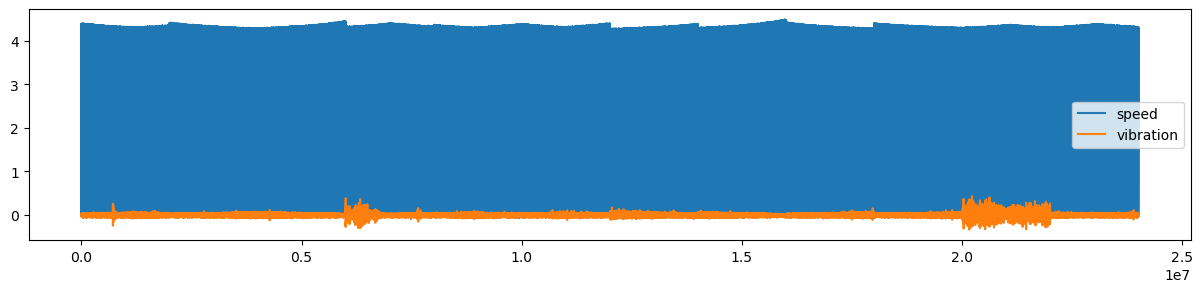

In [8]:
ball.plot(figsize = (15,3))

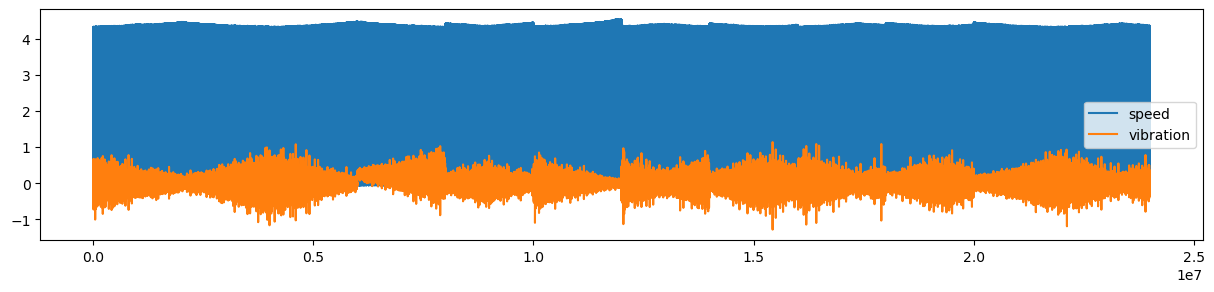

In [9]:
innerrace.plot(figsize = (15,3))

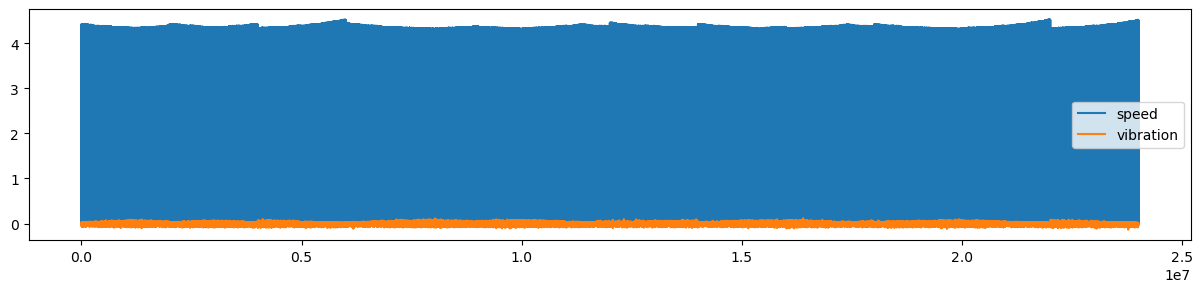

In [10]:
outerrace.plot(figsize = (15,3))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

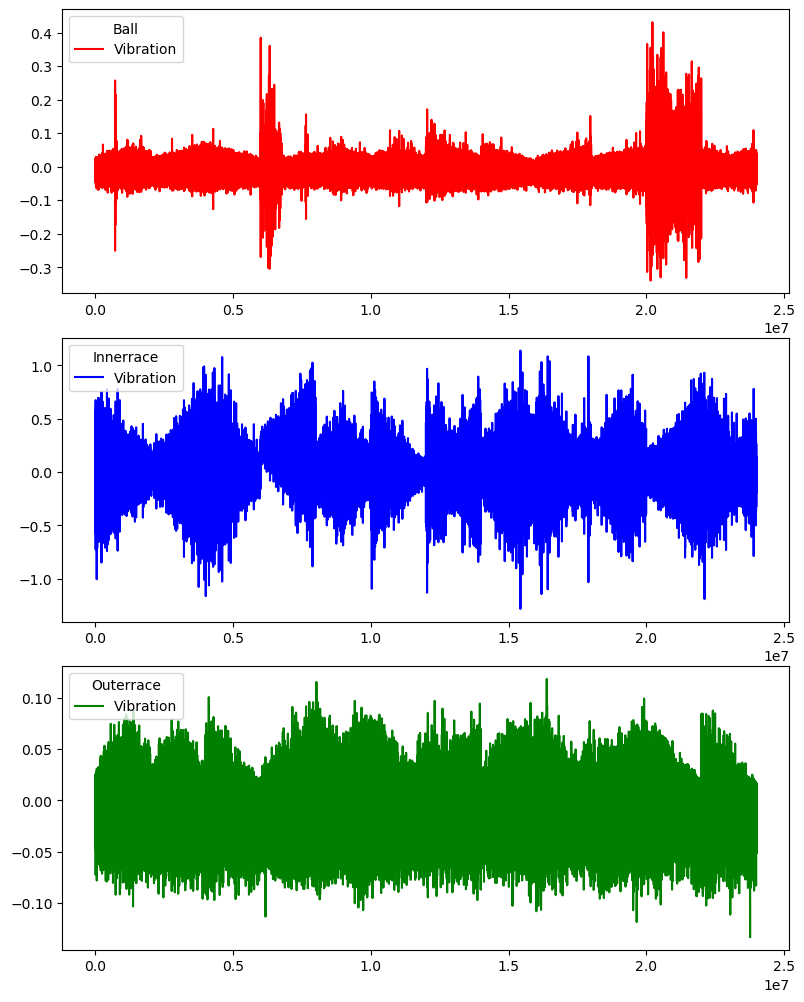

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
#fig.suptitle('Vibration vs Speed')
fig.tight_layout()

# Healthy
g1 =sns.lineplot(ax=axes[0],x="index", y="vibration",data=ball.reset_index(), color = 'red' )
#g1 = axes[0].set_title('Healthy')
#g1.set(xticklabels=[])
g1.set(xlabel=None)
g1.set(ylabel=None)
#g1.legend(loc= 'upper right')
#g1.legend_.set_title('Healthy')
g1.legend(title='Ball', loc='upper left', labels=['Vibration'])

# Ball
g2=sns.lineplot(ax=axes[1],x="index", y="vibration",data=innerrace.reset_index(), color = 'blue' )
#axes[1].set_title('Ball')
g2.set(xlabel=None)
g2.set(ylabel=None)
g2.legend(title='Innerrace', loc='upper left', labels=['Vibration'])

# Outerrace
g3=sns.lineplot(ax=axes[2],x="index", y="vibration",data=outerrace.reset_index(), color = 'green' )
#axes[2].set_title('Outerrace')
g3.set(xlabel=None)
g3.set(ylabel=None)
g3.legend(title='Outerrace', loc='upper left', labels=['Vibration'])



plt.savefig(figuredir +"vibrationSignal" , dpi=600)


In [12]:
def sns_plot(rawdata, filtered ):
    #remove warnings 
    import warnings
    warnings.simplefilter(action="ignore", category=FutureWarning)
    
    fault = rawdata['Faults'][0]
    
    fig, axes = plt.subplots(2, 2 , figsize=(15, 10))
    #fig.suptitle('Vibration vs Speed')
    fig.tight_layout()
    #sns.boxplot(ball['vibration']) 
    g1 =sns.boxplot(rawdata['vibration'] , ax=axes[0,0])
    #g1 = axes[0].set_title('Healthy')
    #g1.set(xticklabels=[])
    g1.set(xlabel=None)
    g1.set(ylabel=None)
    #g1.legend(loc= 'upper right')
    #g1.legend_.set_title('Healthy')
    g1.legend(title=fault + 'Fault raw data', loc='upper left', labels=['Vibration'])
    
    g2=sns.boxplot(rawdata['speed'],ax=axes[0,1] )
    #axes[1].set_title('Ball')
    g2.set(xlabel=None)
    g2.set(ylabel=None)
    g2.legend(title= fault + 'Fault raw data', loc='upper left', labels=['Speed'])
    
    
    g3 =sns.boxplot(filtered['vibration'] , ax=axes[1,0])
    #g1 = axes[0].set_title('Healthy')
    #g1.set(xticklabels=[])
    g3.set(xlabel=None)
    g3.set(ylabel=None)
    #g1.legend(loc= 'upper right')
    #g1.legend_.set_title('Healthy')
    g3.legend(title= fault + 'Fault filtered data', loc='upper left', labels=['Vibration'])
    
    g4=sns.boxplot(filtered['speed'],ax=axes[1,1] )
    #axes[1].set_title('Ball')
    g4.set(xlabel=None)
    g4.set(ylabel=None)
    g4.legend(title=fault + 'Fault filtered data', loc='upper left', labels=['Speed'])
    
    plt.savefig(figuredir +"filter process of " + fault, dpi=600)
    return 

In [13]:
def outliers(data):
    # https://codefires.com/how-to-remove-outliers-in-python-pandas-package/
    upper_limit = data['vibration'].mean() + 3 * data['vibration'].std()
    lower_limit = data['vibration'].mean() - 3 * data['vibration'].std()
    f1 = data[(data['vibration']>lower_limit) & (data['vibration']<upper_limit)]
    f2 = f1[(f1['speed']>0) & (f1['speed']<4)]
    sns_plot(data,f2)
    f2['z_score'] = (f1['vibration'] - f1['vibration'].mean()) / f1['vibration'].std()
    fault = data['Faults'][0]
    
    
    df = f2[['speed','vibration','z_score','Faults']]
    df.to_csv(datasetdir+fault+'.csv',index = False);
    
    return  df
    

In [15]:
def outliers2(data):
    # https://codefires.com/how-to-remove-outliers-in-python-pandas-package/
    upper_limit = data['vibration'].mean() + 3 * data['vibration'].std()
    lower_limit = data['vibration'].mean() - 3 * data['vibration'].std()
    f1 = data[(data['vibration']>lower_limit) & (data['vibration']<upper_limit)]
    f2 = f1[(f1['speed']>0) & (f1['speed']<4)]
    #sns_plot(data,f2)
    f2['z_score'] = (f1['vibration'] - f1['vibration'].mean()) / f1['vibration'].std()
    fault = data['Faults'][0]
    
    
    df = f2[['speed','vibration','z_score','Faults']]
    df.to_csv(datasetdir+fault+'.csv',index = False);
    
    return  df

/tmp/ipykernel_413681/3582553361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['z_score'] = (f1['vibration'] - f1['vibration'].mean()) / f1['vibration'].std()
/tmp/ipykernel_413681/176349608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['z_score'] = (f1['vibration'] - f1['vibration'].mean()) / f1['vibration'].std()
/tmp/ipykernel_413681/3582553361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

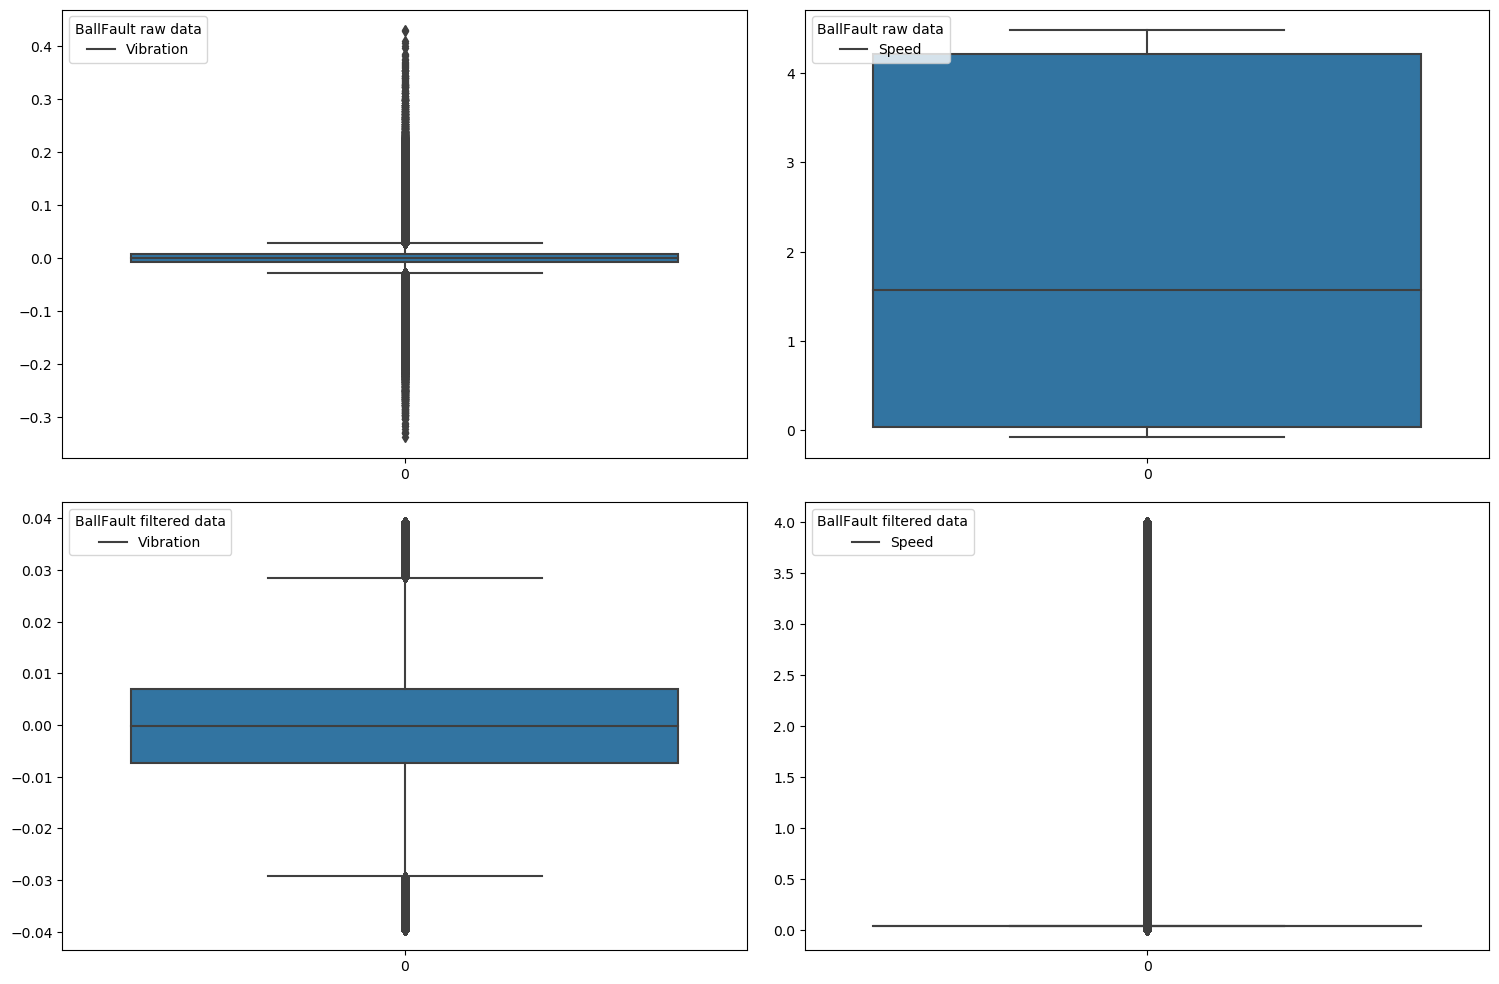

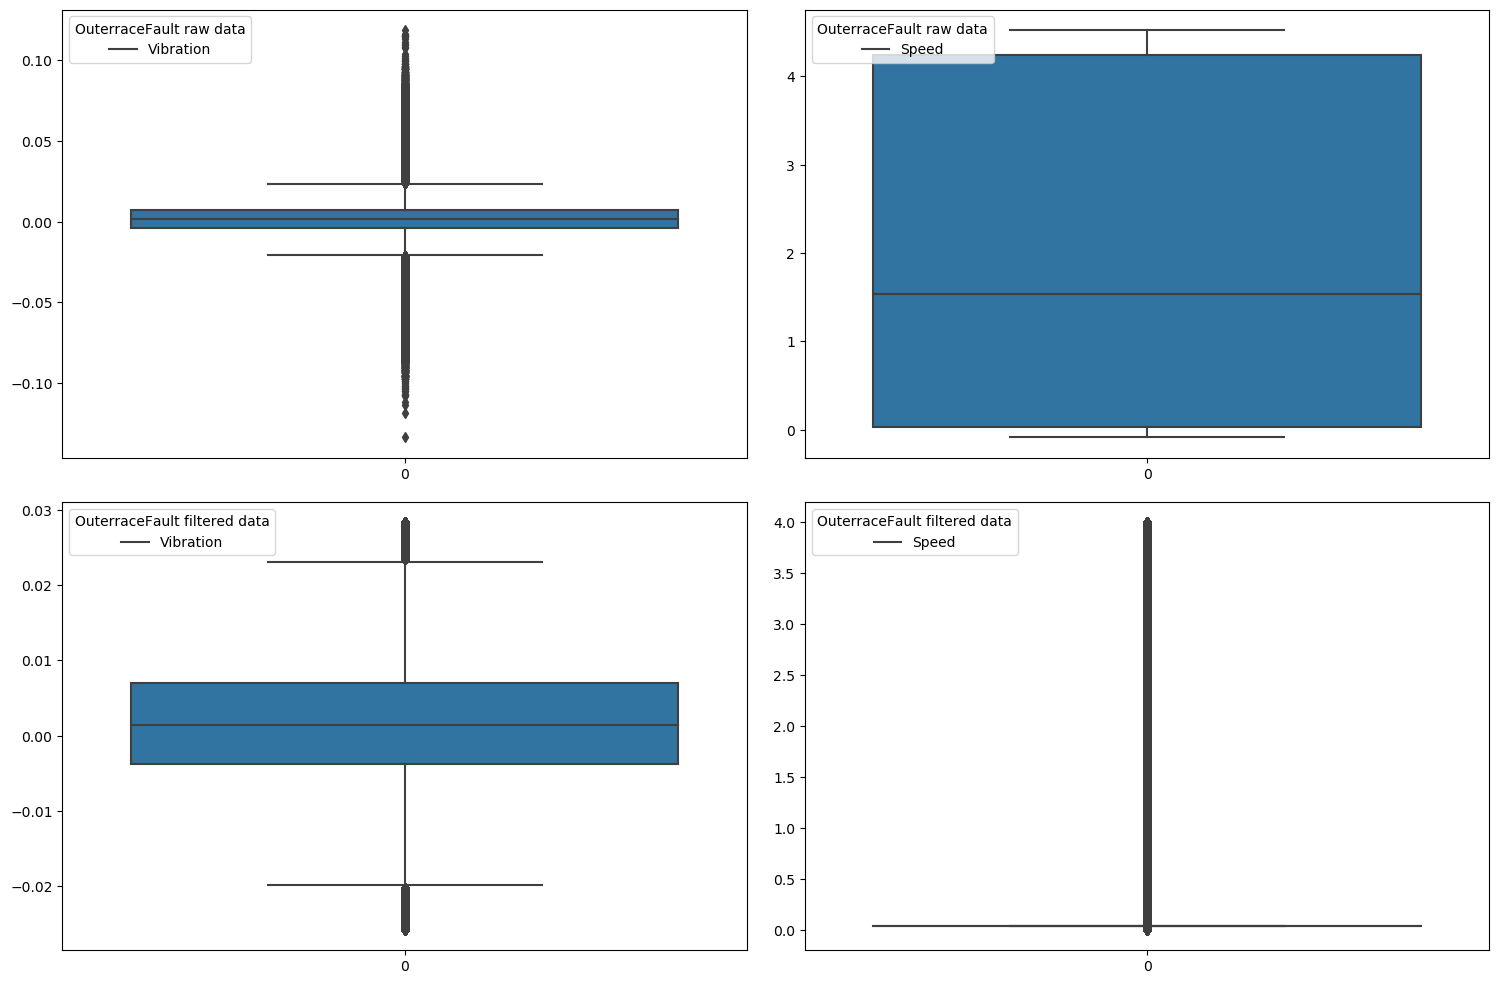

In [16]:
filter_ball = outliers(ball)
filter_innerrace = outliers2(innerrace)
filter_outerrace = outliers(outerrace)